In [1]:
import sebcreditrisk as scr
import numpy as np
import pandas as pd
from scipy.stats import norm
import torch
import matplotlib.pyplot as plt
import os

In [2]:
# scr.process_data()

In [3]:
gcd = scr.load_data('gcd')
gcd

,year,quarter,asset_class,country,industry,count,t1,t2
0,2007,2,1,DK,250,1,9,8
1,2007,2,1,DK,750,1,1,1
2,2007,2,1,FI,250,1,13,13
3,2007,2,1,FI,750,1,1,1
4,2007,2,1,SE,250,1,9,8
...,...,...,...,...,...,...,...,...
39846,2014,4,6,SE,650,1,8,8
39847,2014,4,6,SE,650,1,9,9
39848,2014,4,6,SE,650,1,10,8
39849,2014,4,6,SE,650,1,10,9


In [4]:
scr.load_data('rating')

,s&p,gcd,seb
0,AAA,1,1
1,AA+,2,1
2,AA,3,2
3,AA-,4,2
4,A+,5,3
5,A,6,3
6,A-,7,4
7,BBB+,8,5
8,BBB,9,6
9,BBB-,10,7


In [5]:
seb = scr.load_data('seb')
seb

,year,t1,t2,industry_nace,industry_1,industry_2,country,count
0,2009,1,1,00000,300,70,SE,1
1,2009,1,1,32501,70,50,NO,1
2,2009,1,1,33200,70,50,FI,1
3,2009,1,1,35300,80,170,SE,1
4,2009,1,1,52230,140,100,SE,2
...,...,...,...,...,...,...,...,...
49140,2019,15,16,43210,90,20,SE,1
49141,2019,15,16,46731,100,110,SE,1
49142,2019,15,16,64202,260,10,SE,1
49143,2019,15,16,70220,160,10,SE,1


In [6]:
scr.load_data('nace')

,code_nace,name_nace,code_1,name_1,code_2,name_2
0,00000,UNKNOWN,300,Uncoded,70,Other
1,01100,Growing of non-perennial crops,10,"Agriculture, forestry and fishing",150,"Agriculture, forestry and fishing"
2,01110,"Growing of cereals (except rice), leguminous c...",10,"Agriculture, forestry and fishing",150,"Agriculture, forestry and fishing"
3,01120,Growing of rice,10,"Agriculture, forestry and fishing",150,"Agriculture, forestry and fishing"
4,01130,"Growing of vegetables and melons, roots and tu...",10,"Agriculture, forestry and fishing",150,"Agriculture, forestry and fishing"
...,...,...,...,...,...,...
1073,99998,Estate of deceased,220,Other,70,Other
1074,99999,Uncoded,300,Uncoded,70,Other
1075,NA,Not available,300,Uncoded,70,Other
1076,PPMMM,Private Customers-mortgage(fictitious code onl...,255,"Households, mortgage",130,Households


In [7]:
scr.get_code_name('01100', 0)

['Growing of non-perennial crops']

In [8]:
scr.get_code_name(150, 1)

['Shipping']

In [9]:
scr.get_code_name(100, 2)

['Transportation']

In [10]:
df = scr.get_gcd_transition_matrix(year=[2012], quarter=[] ,asset_class=[], country=[], industry=[], count=True)
pd.DataFrame(df)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,53,76,7,2,2,0,1,0,1,0,3,0,3,0,0,1
1,5,1454,303,62,33,11,7,5,3,5,2,5,6,2,0,1
2,7,483,4605,317,169,35,8,6,8,25,10,12,3,4,1,6
3,7,230,595,1008,500,124,41,24,28,22,16,3,9,5,0,1
4,1,367,523,957,1845,539,163,102,94,97,30,18,18,46,1,6
5,0,54,99,270,664,722,410,97,150,127,30,16,7,26,0,5
6,1,25,47,65,242,340,611,400,172,152,37,13,20,32,0,3
7,0,22,34,41,138,121,181,483,228,148,25,18,10,27,1,2
8,0,17,25,49,133,161,143,204,557,384,52,36,26,48,0,5
9,0,43,87,127,278,298,196,227,431,1789,222,133,99,194,0,19


In [11]:
df = scr.get_seb_transition_matrix(year=[2012], count=True)
pd.DataFrame(df)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,35,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,131,8,3,4,2,3,1,0,1,0,2,0,0,0,0
2,0,1,144,2,2,0,0,2,0,1,0,3,0,0,0,0
3,0,0,4,284,18,2,0,0,0,2,0,3,0,0,0,0
4,0,0,2,30,244,14,3,1,4,1,1,5,0,0,0,0
5,1,1,0,9,23,316,28,6,2,0,0,8,0,0,0,0
6,0,1,1,0,15,20,457,23,8,2,2,4,0,0,0,0
7,0,0,1,0,4,11,56,1208,75,15,5,16,0,1,0,0
8,0,3,2,0,0,3,11,145,2183,180,31,25,6,1,3,2
9,0,2,1,0,0,0,2,24,316,2074,140,66,18,6,2,8


In [12]:
pd_smoothed = scr.qmm(df).reshape(-1,1)
pd_smoothed

array([[2.07402250e-06],
       [7.35303043e-06],
       [1.48557754e-05],
       [2.65617671e-05],
       [4.36955414e-05],
       [6.59926720e-05],
       [1.01274534e-04],
       [2.01452344e-04],
       [6.10849265e-04],
       [2.54095893e-03],
       [9.93554849e-03],
       [2.26284580e-02],
       [4.87957494e-02],
       [1.00833836e-01],
       [2.10981170e-01]])

In [13]:
gdp_se = pd.read_csv(os.path.join(scr.raw_data_dir, 'gdp_se.csv'), index_col='label').to_numpy()[:28].reshape(-1)/100
gdp_se

array([ 0.0126098 ,  0.01950023,  0.02567925,  0.02070593,  0.04489282,
        0.02657798,  0.01187776, -0.00588305,  0.03195333,  0.05952107,
       -0.04339791, -0.00450559,  0.03439222,  0.04662774,  0.02858803,
        0.04336856,  0.02309811,  0.02196921,  0.01449499,  0.04766349,
        0.04247184,  0.04311836,  0.03070527,  0.01579456,  0.03935193,
        0.03929973, -0.02065616, -0.01158593])

In [14]:
m = np.mean(gdp_se)
sd = np.std(gdp_se)
gdp_se_norm = (gdp_se - m) / sd

In [15]:
m

0.02279405571106558

In [16]:
sd

0.02276183893103292

In [17]:
gdp_se_norm

array([-0.44742673, -0.14470831,  0.12675556, -0.09173794,  0.97086884,
        0.16623995, -0.47958773, -1.2598763 ,  0.40239616,  1.61353459,
       -2.90802345, -1.1993604 ,  0.50954416,  1.04708938,  0.25454783,
        0.9039035 ,  0.01335789, -0.03623807, -0.36460453,  1.09259331,
        0.86450773,  0.8929115 ,  0.34756463, -0.30750994,  0.72744006,
        0.72514671, -1.90890637, -1.51042205])

In [18]:
transitions = [scr.get_seb_transition_matrix(year=[year], country=[], count=True) for year in range(2009,2020)]
z = -np.flip(gdp_se_norm[:11])

In [19]:
z

array([ 2.90802345, -1.61353459, -0.40239616,  1.2598763 ,  0.47958773,
       -0.16623995, -0.97086884,  0.09173794, -0.12675556,  0.14470831,
        0.44742673])

In [20]:
np.mean(np.vstack([scr.get_pd(m) for m in transitions]))

0.005178014117714733

In [21]:
odf = np.array([scr.get_pd(m) for m in transitions])
odf

array([0.01193745, 0.00613497, 0.00651537, 0.0049445 , 0.00482784,
       0.00420278, 0.00586137, 0.0028492 , 0.00264339, 0.00303541,
       0.00400588])

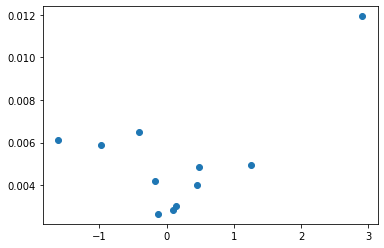

In [22]:
odf = np.array([scr.get_pd(m) for m in transitions])
plt.scatter(z, odf)

In [23]:
MV = scr.fit_mv(transitions, z, False, lr=0.001, rho0=0.5)

0.005178014117714733
tensor([[2.3650e-01],
        [8.1652e-08],
        [2.8124e-05],
        [8.9967e-03],
        [8.2748e-04],
        [7.4759e-05],
        [2.1492e-06],
        [2.0474e-04],
        [8.7580e-05],
        [2.4984e-04],
        [7.4095e-04]], dtype=torch.float64, grad_fn=<AddBackward0>)
0.7403625326580314 Parameter containing:
tensor([[0.4990]], dtype=torch.float64, requires_grad=True)
tensor([[2.3582e-01],
        [8.4697e-08],
        [2.8658e-05],
        [9.0235e-03],
        [8.3504e-04],
        [7.5958e-05],
        [2.2073e-06],
        [2.0742e-04],
        [8.8944e-05],
        [2.5297e-04],
        [7.4795e-04]], dtype=torch.float64, grad_fn=<AddBackward0>)
0.7387920093442865 Parameter containing:
tensor([[0.4980]], dtype=torch.float64, requires_grad=True)
tensor([[2.3515e-01],
        [8.7844e-08],
        [2.9200e-05],
        [9.0502e-03],
        [8.4264e-04],
        [7.7171e-05],
        [2.2666e-06],
        [2.1012e-04],
        [9.0323e-05],
   

0.5253374322575913 Parameter containing:
tensor([[0.3177]], dtype=torch.float64, requires_grad=True)
tensor([[1.3152e-01],
        [1.3057e-05],
        [3.6450e-04],
        [1.2416e-02],
        [2.7472e-03],
        [6.4709e-04],
        [8.2815e-05],
        [1.1781e-03],
        [7.1057e-04],
        [1.3276e-03],
        [2.5672e-03]], dtype=torch.float64, grad_fn=<AddBackward0>)
0.5246615470802946 Parameter containing:
tensor([[0.3170]], dtype=torch.float64, requires_grad=True)
tensor([[1.3114e-01],
        [1.3271e-05],
        [3.6746e-04],
        [1.2423e-02],
        [2.7570e-03],
        [6.5148e-04],
        [8.3786e-05],
        [1.1845e-03],
        [7.1524e-04],
        [1.3345e-03],
        [2.5768e-03]], dtype=torch.float64, grad_fn=<AddBackward0>)
0.5239879855002217 Parameter containing:
tensor([[0.3162]], dtype=torch.float64, requires_grad=True)
tensor([[1.3077e-01],
        [1.3489e-05],
        [3.7044e-04],
        [1.2430e-02],
        [2.7669e-03],
        [6.

0.4187307330057246 Parameter containing:
tensor([[0.1677]], dtype=torch.float64, requires_grad=True)
tensor([[0.0662],
        [0.0002],
        [0.0014],
        [0.0124],
        [0.0047],
        [0.0020],
        [0.0006],
        [0.0028],
        [0.0021],
        [0.0030],
        [0.0045]], dtype=torch.float64, grad_fn=<AddBackward0>)
0.4183935504198132 Parameter containing:
tensor([[0.1671]], dtype=torch.float64, requires_grad=True)
tensor([[0.0659],
        [0.0002],
        [0.0014],
        [0.0124],
        [0.0047],
        [0.0020],
        [0.0006],
        [0.0028],
        [0.0021],
        [0.0030],
        [0.0045]], dtype=torch.float64, grad_fn=<AddBackward0>)
0.4180574087831118 Parameter containing:
tensor([[0.1665]], dtype=torch.float64, requires_grad=True)
tensor([[0.0657],
        [0.0002],
        [0.0014],
        [0.0124],
        [0.0047],
        [0.0020],
        [0.0006],
        [0.0028],
        [0.0021],
        [0.0030],
        [0.0046]], dtype=torc

0.3667753868783904 Parameter containing:
tensor([[0.0524]], dtype=torch.float64, requires_grad=True)
tensor([[0.0256],
        [0.0013],
        [0.0032],
        [0.0097],
        [0.0059],
        [0.0038],
        [0.0021],
        [0.0045],
        [0.0039],
        [0.0047],
        [0.0057]], dtype=torch.float64, grad_fn=<AddBackward0>)
0.3666262065093582 Parameter containing:
tensor([[0.0520]], dtype=torch.float64, requires_grad=True)
tensor([[0.0255],
        [0.0013],
        [0.0032],
        [0.0097],
        [0.0059],
        [0.0038],
        [0.0021],
        [0.0045],
        [0.0039],
        [0.0047],
        [0.0057]], dtype=torch.float64, grad_fn=<AddBackward0>)
0.3664778467744088 Parameter containing:
tensor([[0.0515]], dtype=torch.float64, requires_grad=True)
tensor([[0.0253],
        [0.0013],
        [0.0032],
        [0.0097],
        [0.0059],
        [0.0038],
        [0.0021],
        [0.0045],
        [0.0039],
        [0.0047],
        [0.0057]], dtype=torc

0.35506994464658465 Parameter containing:
tensor([[0.0043]], dtype=torch.float64, requires_grad=True)
tensor([[0.0087],
        [0.0037],
        [0.0047],
        [0.0064],
        [0.0056],
        [0.0049],
        [0.0042],
        [0.0052],
        [0.0050],
        [0.0052],
        [0.0055]], dtype=torch.float64, grad_fn=<AddBackward0>)
0.35506994464924396 Parameter containing:
tensor([[0.0043]], dtype=torch.float64, requires_grad=True)


In [24]:
MV.eval()
pd_pred = MV(np.mean(odf), z).detach().numpy().reshape(-1)
pd_pred

array([0.00869107, 0.00373622, 0.00472127, 0.00644853, 0.00557812,
       0.00493835, 0.00423322, 0.00518562, 0.0049755 , 0.00523774,
       0.0055446 ])

In [25]:
np.mean(np.abs(pd_pred - odf))

0.001860619902164657

In [26]:
MV.rho.detach().numpy()

array([[0.0042816]])